In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# ▒ 한글 폰트 설정 (플랫폼별 처리)
import platform
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# ▒ .env 환경변수 로드
load_dotenv()
host = os.getenv("DB_HOST")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
database = os.getenv("DB_NAME")

# ▒ DB 연결
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:3306/{database}")


In [33]:
query1 = """
SELECT station_name, annual_average
FROM pollution_pm10_concentration_by_station
WHERE province LIKE '서울'
"""

query2 = """
SELECT station_name, annual_avg
FROM pollution_pm25_concentration_by_station
WHERE province LIKE '서울'
"""

df_10 = pd.read_sql(query1, engine)
df_10.rename(columns={'station_name' : '자치구',
                   'annual_average' : '미세먼지 농도'},
          inplace=True)


df_25 = pd.read_sql(query2, engine)
df_25.rename(columns={'station_name' : '자치구',
                   'annual_avg' : '초미세먼지 농도'},
          inplace=True)

df_dust = pd.merge(df_10, df_25, on='자치구', how='outer')
df_dust

,자치구,미세먼지 농도,초미세먼지 농도
0,강남구,37.0,19.0
1,강동구,39.0,20.0
2,강북구,38.0,19.0
3,강서구,42.0,19.0
4,관악구,42.0,20.0
5,광진구,36.0,19.0
6,구로구,40.0,19.0
7,금천구,36.0,20.0
8,노원구,39.0,21.0
9,도봉구,35.0,19.0


In [30]:
%cd ~
%cd eda-repo-3/

/home/park
/home/park/eda-repo-3


In [32]:
# ▶️ csv 불러오기 경로 지정
input_path = os.path.join('RESULT','csv','seoul_integrated_data.csv')
# input_path = 'RESULT/csv/seoul_integrated_data.csv'
# os.path.dirname(output_path)
df = pd.read_csv(input_path)

df_companion = df.iloc[:, [0,1]]
df_companion.rename(columns={
  'district' : '자치구',
  'companion_animal_registration' : '반려동물 등록수'}, inplace=True)
df_companion

/tmp/ipykernel_46536/2655877128.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_companion.rename(columns={


,자치구,반려동물 등록수
0,강남구,34843.0
1,강동구,25515.0
2,강북구,18585.0
3,강서구,33636.0
4,관악구,26408.0
5,광진구,20272.0
6,구로구,19412.0
7,금천구,12925.0
8,노원구,27138.0
9,도봉구,19873.0


In [34]:
df_merge = pd.merge(df_companion, df_dust, on='자치구', how='outer')
df_merge

,자치구,반려동물 등록수,미세먼지 농도,초미세먼지 농도
0,강남구,34843.0,37.0,19.0
1,강동구,25515.0,39.0,20.0
2,강북구,18585.0,38.0,19.0
3,강서구,33636.0,42.0,19.0
4,관악구,26408.0,42.0,20.0
5,광진구,20272.0,36.0,19.0
6,구로구,19412.0,40.0,19.0
7,금천구,12925.0,36.0,20.0
8,노원구,27138.0,39.0,21.0
9,도봉구,19873.0,35.0,19.0


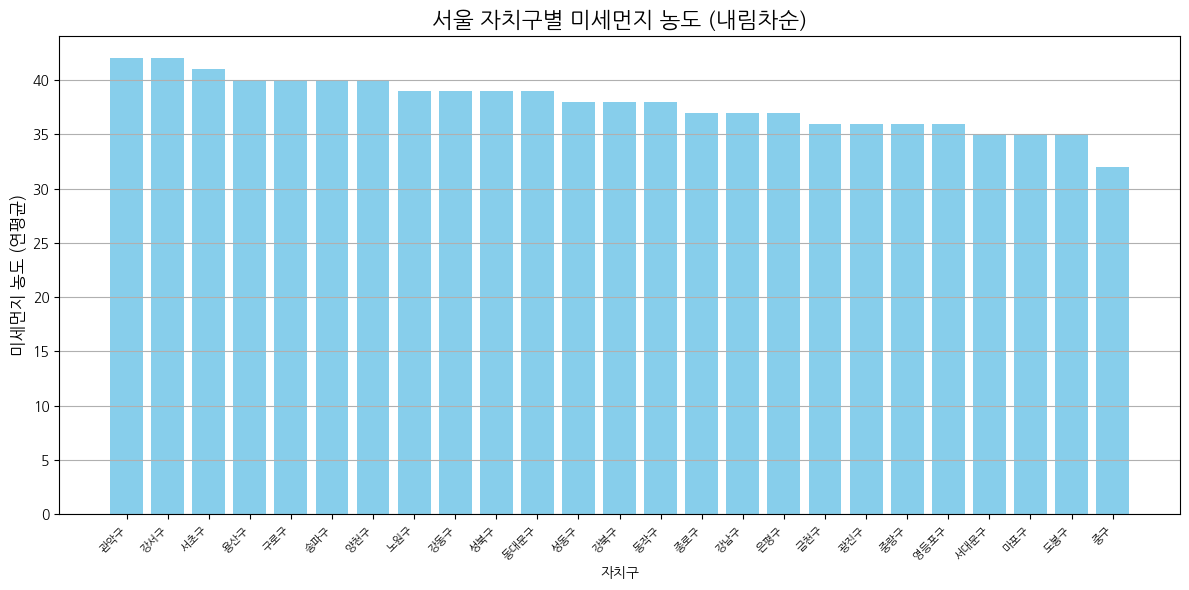

In [37]:
df_sorted = df_merge.sort_values('미세먼지 농도', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_sorted['자치구'], df_sorted['미세먼지 농도'], color='skyblue')
plt.title('서울 자치구별 미세먼지 농도 (내림차순)', fontsize=16)
plt.xlabel('자치구', fontsize=10)
plt.ylabel('미세먼지 농도 (연평균)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)  # 폰트 크기 축소
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

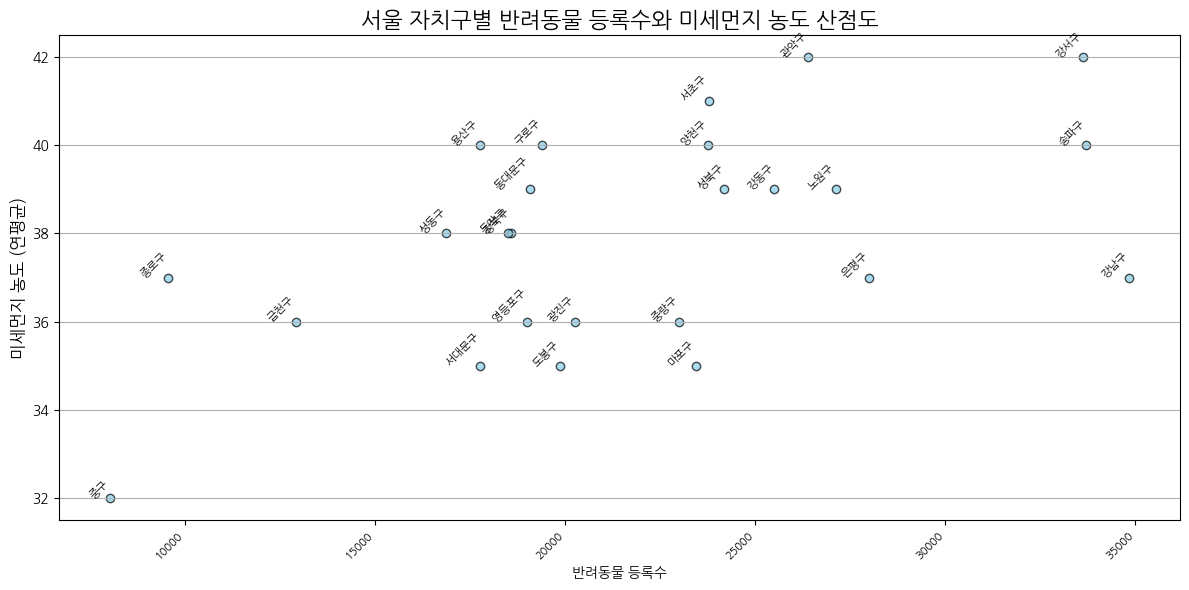

In [42]:
# Assuming df_merge is the dataframe containing the relevant data
plt.figure(figsize=(12, 6))
plt.scatter(df_merge['반려동물 등록수'], df_merge['미세먼지 농도'], color='skyblue', alpha=0.7, edgecolors='black')

# 각 점에 자치구 이름 라벨 표시
for i, txt in enumerate(df_merge['자치구']):
    plt.annotate(txt, 
                 (df_merge['반려동물 등록수'].iloc[i], df_merge['미세먼지 농도'].iloc[i]), 
                 fontsize=8, rotation=45, ha='right')
    
plt.title('서울 자치구별 반려동물 등록수와 미세먼지 농도 산점도', fontsize=16)
plt.xlabel('반려동물 등록수', fontsize=10)
plt.ylabel('미세먼지 농도 (연평균)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)  # 폰트 크기 축소
plt.yticks(fontsize=10)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

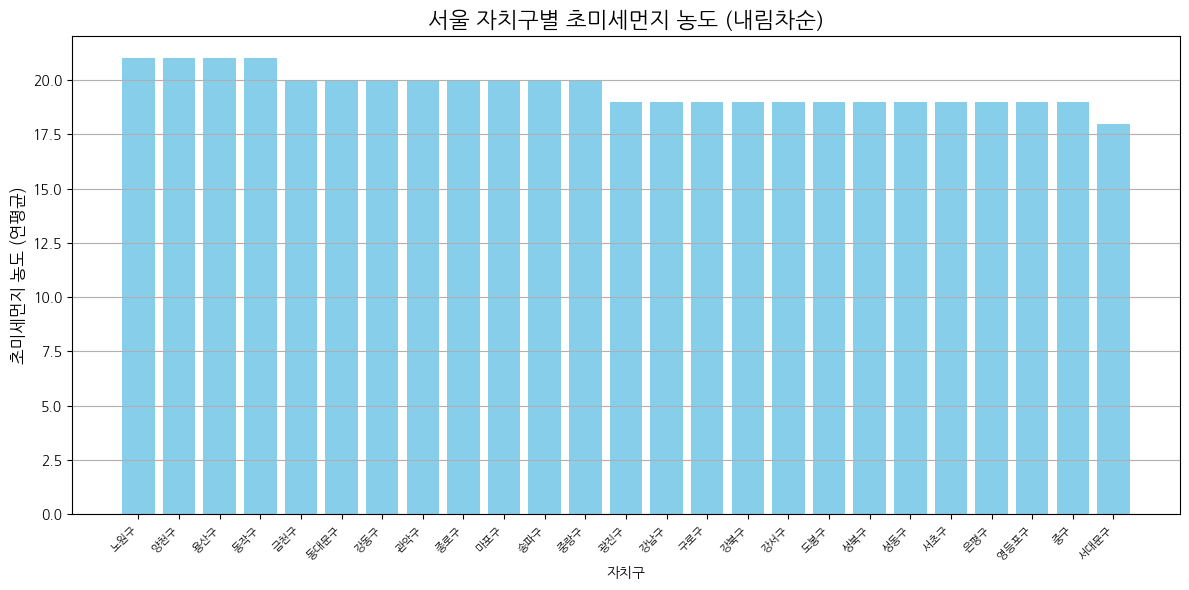

In [38]:
df_sorted = df_merge.sort_values('초미세먼지 농도', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_sorted['자치구'], df_sorted['초미세먼지 농도'], color='skyblue')
plt.title('서울 자치구별 초미세먼지 농도 (내림차순)', fontsize=16)
plt.xlabel('자치구', fontsize=10)
plt.ylabel('초미세먼지 농도 (연평균)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)  # 폰트 크기 축소
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

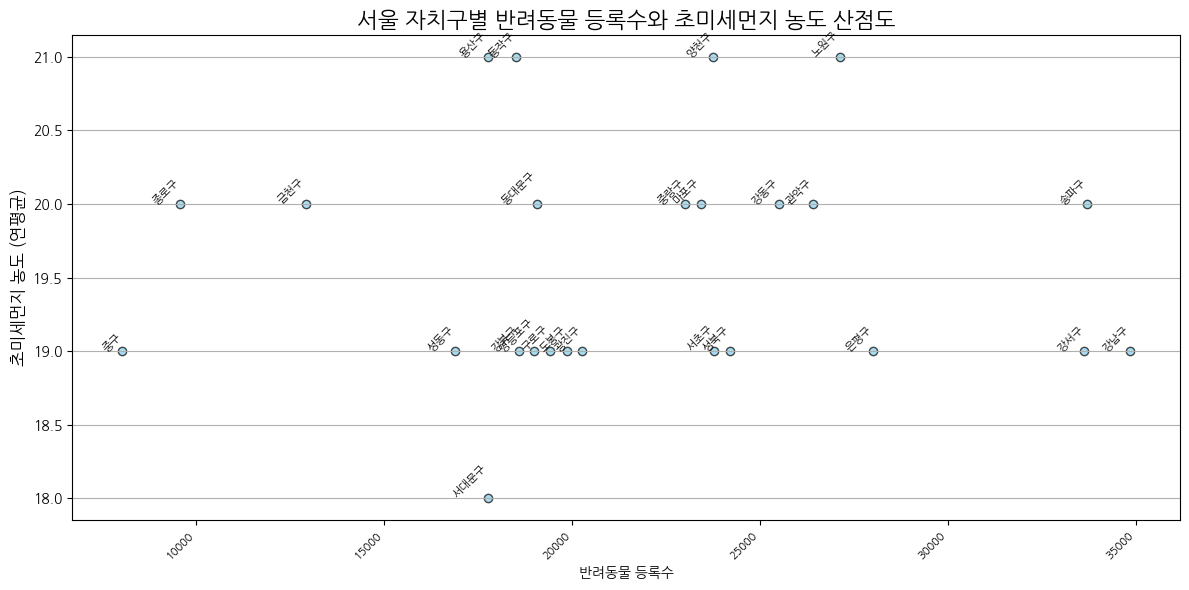

In [41]:
# Assuming df_merge is the dataframe containing the relevant data
plt.figure(figsize=(12, 6))
plt.scatter(df_merge['반려동물 등록수'], df_merge['초미세먼지 농도'], color='skyblue', alpha=0.7, edgecolors='black')

# 각 점에 자치구 이름 라벨 표시
for i, txt in enumerate(df_merge['자치구']):
    plt.annotate(txt, 
                 (df_merge['반려동물 등록수'].iloc[i], df_merge['초미세먼지 농도'].iloc[i]), 
                 fontsize=8, rotation=45, ha='right')

plt.title('서울 자치구별 반려동물 등록수와 초미세먼지 농도 산점도', fontsize=16)
plt.xlabel('반려동물 등록수', fontsize=10)
plt.ylabel('초미세먼지 농도 (연평균)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)  # 폰트 크기 축소
plt.yticks(fontsize=10)
plt.grid(axis='y')
plt.tight_layout()
plt.show()